# Predict what sorts of people were more likely to survive in the infamous Titanic shipwreck using Logistic Regression, Decision Trees, RandomForest Artificial Neural Network and comparing the model predictions

<b>Kaggle Dataset:<b>
    https://www.kaggle.com/c/titanic

<b>Import required libraries<b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Load Training Dataset<b>

In [3]:
training_data = pd.read_csv('titanic_train.csv')

<b>Do Exploratory Data Analysis<b>

In [4]:
training_data.shape

(891, 12)

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
training_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
training_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<b>Data Visualization<b>

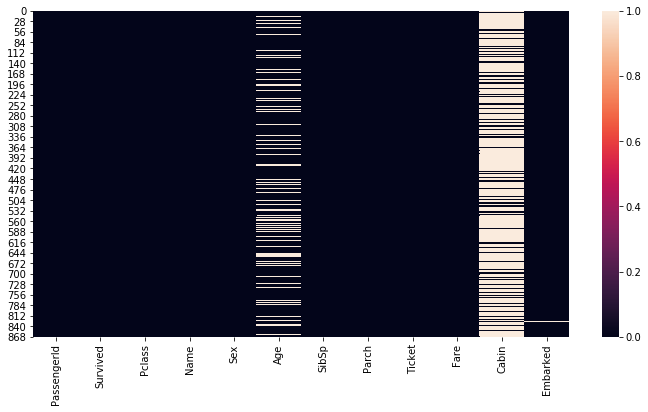

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data=training_data.isnull())

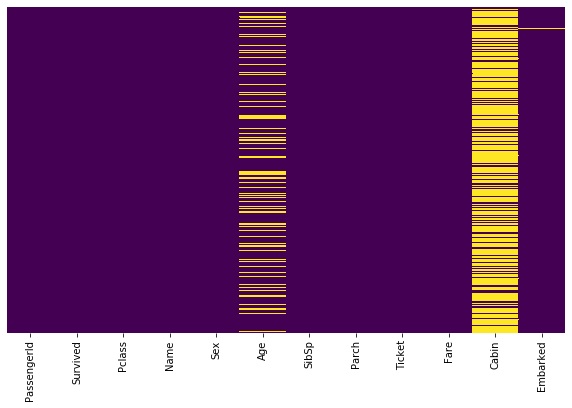

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(data=training_data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

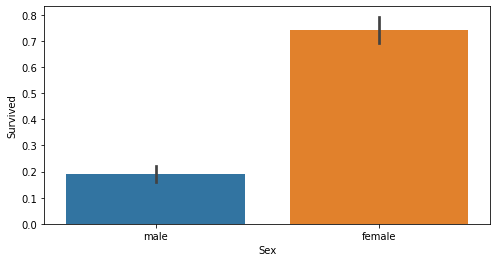

In [33]:
plt.figure(figsize=(8,4))
sns.barplot(x='Sex',y='Survived',data=training_data)

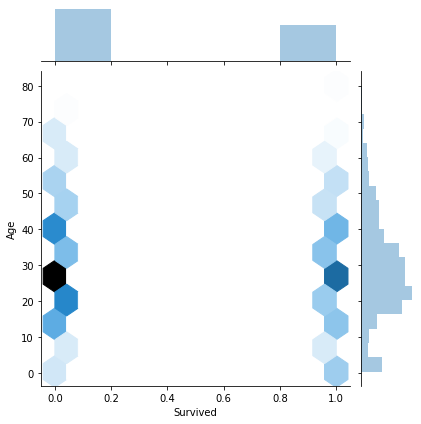

In [39]:
sns.jointplot(x='Survived',y='Age',data=training_data, kind='hex')

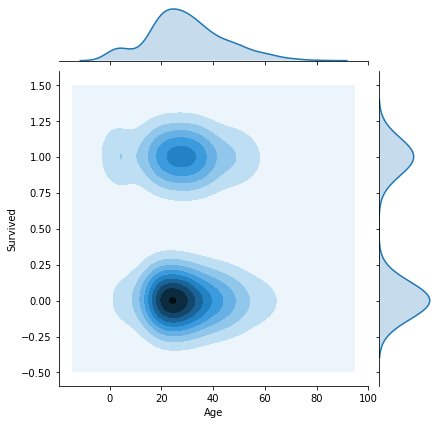

In [42]:
sns.jointplot(x='Age',y='Survived',data=training_data, kind='kde')

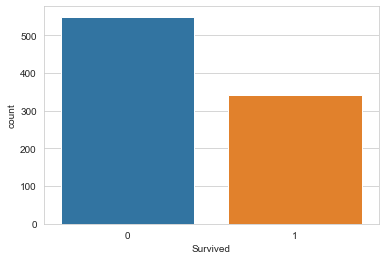

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=training_data)

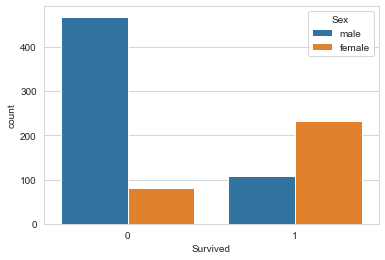

In [48]:
sns.countplot(x='Survived',data=training_data,hue='Sex')

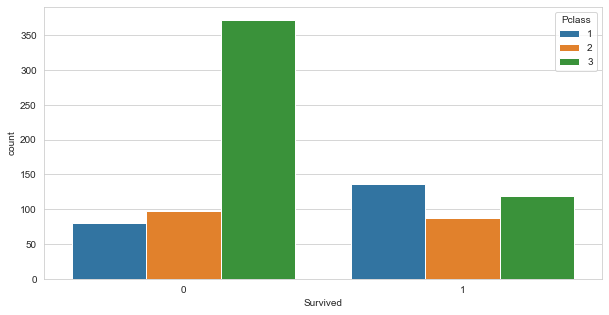

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',data=training_data,hue='Pclass')

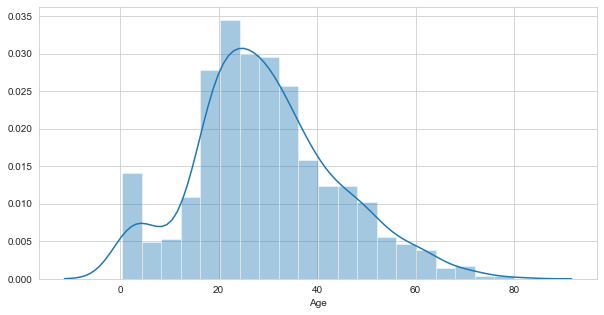

In [55]:
plt.figure(figsize=(10,5))
sns.distplot(training_data['Age'].dropna())

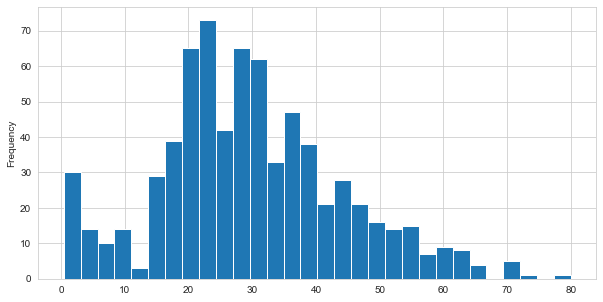

In [58]:
plt.figure(figsize=(10,5))
training_data['Age'].plot.hist(bins=30)

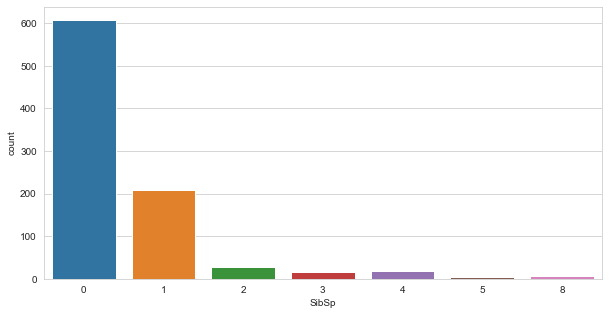

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp',data=training_data)

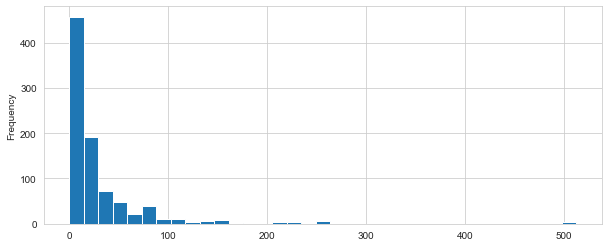

In [61]:
training_data['Fare'].plot.hist(bins=35,figsize=(10,4))

<b>Cleaning data for further processing and visualization<b>

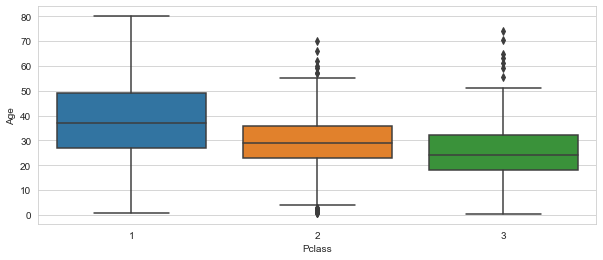

In [64]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass',y='Age',data=training_data)

<b>Implementing mean imputation for replacing missing age data<b>

In [66]:
def age_imputation(cols):
    age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age):
        
        if p_class==1:
            return 37
        elif p_class==2:
            return 29
        else:
            return 24
    else:
        return age

<b>Note: In the above method, we are directly getting the age based on the above boxplot. Else we can compute mean for each Pclass ourselves<b>

<b>Replacing missing data<b>

In [67]:
training_data['Age'] = training_data[['Age','Pclass']].apply(age_imputation, axis=1)

In [68]:
training_data.shape

(891, 12)

In [72]:
#training_data['Age'].isnull()

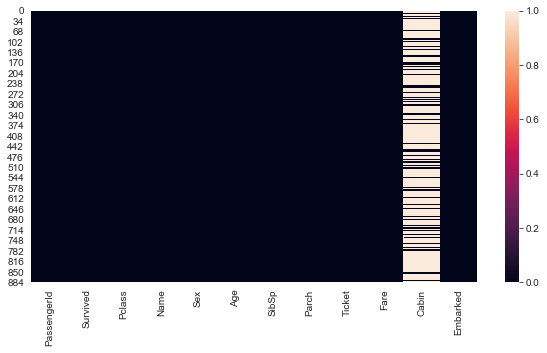

In [74]:
plt.figure(figsize=(10,5))
sns.heatmap(training_data.isnull())

<b>Missing values for Age has been successfully computed. But Cabin is having almost 95% missing values, hence we drop it from the dataset<b>

In [75]:
training_data.drop('Cabin',axis=1,inplace=True)

<b>Revisualizing the dataset<b>

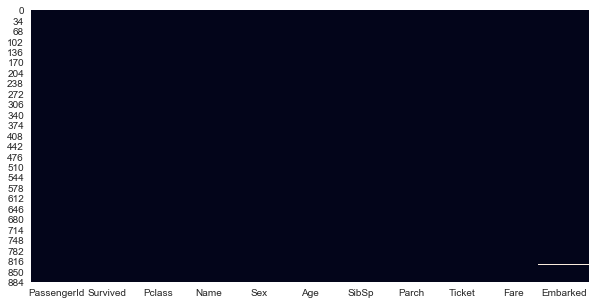

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(data=training_data.isnull(),cbar=False) #set cbar to false to view other missing data

<b>Dropping missing values for Embarked field<b>

In [81]:
training_data.dropna(inplace=True)

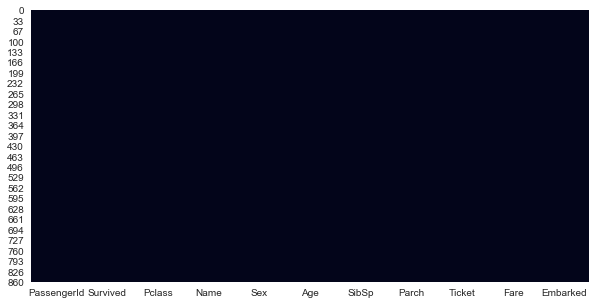

In [82]:
plt.figure(figsize=(10,5))
sns.heatmap(data=training_data.isnull(),cbar=False)

<b>Convert categorical varibales into dummy/indicator varibales<b>

In [87]:
#Remove columns which are perfect predictors of each other to avoid multicolinearity

In [88]:
sex = pd.get_dummies(training_data['Sex'],drop_first=True)
embarked = pd.get_dummies(training_data['Embarked'],drop_first=True)

In [89]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [90]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [91]:
training_data = pd.concat([training_data,sex,embarked],axis=1)

In [92]:
training_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


<b>Based on Feature engineering, we are doing Feature Selection and dropping unneccessary data which are not fruitful for model prediction<b>

In [93]:
training_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [94]:
training_data.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [95]:
training_data.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [96]:
training_data.drop('PassengerId',axis=1,inplace=True)

In [97]:
training_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<b>Parch column above is also a categorical data. We will create 2 separate models, one with the Parch column as it is and another by converting Parch to dummy varibales<b>

In [98]:
X = training_data.drop('Survived',axis=1)
y = training_data['Survived']

<b>Creating test train split from training data<b>

In [100]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [106]:
X_train.shape

(666, 8)

In [107]:
y_test.shape

(223,)

In [108]:
X_test.shape

(223, 8)

<b>Do Model Training using Logistic Regression<b>

In [109]:
from sklearn.linear_model import LogisticRegression

In [112]:
logremodel = LogisticRegression()

In [117]:
logremodel.fit(X_train,y_train)

e:\users\user.desktop-3hhgvth\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
predictions = logremodel.predict(X_test)

<b>Evaluation Metrics<b>

In [119]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [120]:
print(confusion_matrix(y_test,predictions))

[[118  20]
 [ 25  60]]


In [121]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       138
           1       0.75      0.71      0.73        85

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [122]:
training_data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<b>Do Model Training & Prediction using Decision Trees<b>

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
tree = DecisionTreeClassifier()

In [125]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [126]:
dt_preds = tree.predict(X_test)

<b>Evaluation Metrics<b>

In [127]:
print(classification_report(y_test,dt_preds))
print('\n')
print(confusion_matrix(y_test,dt_preds))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       138
           1       0.75      0.76      0.76        85

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



[[116  22]
 [ 20  65]]


<b>Do Model Training & Prediction using Random Forest Algorithm<b>

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rfc = RandomForestClassifier(n_estimators=200)

In [134]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [136]:
rfc_preds = rfc.predict(X_test)

<b>Evaluation Metrics<b>

In [138]:
print(classification_report(y_test,rfc_preds))
print('\n')
print(confusion_matrix(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       138
           1       0.75      0.69      0.72        85

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



[[118  20]
 [ 26  59]]


<b>Do Model Training & Prediction using Deep Learning ANNs<b>

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
dl_model = Sequential()

dl_model.add(Dense(50,activation='relu'))
dl_model.add(Dense(30,activation='relu'))

dl_model.add(Dense(1,activation='sigmoid'))

dl_model.compile(optimizer='adam',loss='binary_crossentropy')

<b>Scale the data<b>

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
scaler = MinMaxScaler()

In [184]:
X = training_data.drop('Survived',axis=1).values
y = training_data['Survived'].values
y=np.array(y)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [186]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(666, 8) (223, 8) (666,) (223,)


In [187]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
print(type(X_train),type(y_train),type(X_test),type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [189]:
dl_model.fit(X_train,y_train,epochs=100)

Train on 666 samples
Epoch 1/100
666/666 [==============================] - 0s 100us/sample - loss: 0.3738
Epoch 2/100
666/666 [==============================] - 0s 81us/sample - loss: 0.3749
Epoch 3/100
666/666 [==============================] - 0s 74us/sample - loss: 0.3729
Epoch 4/100
666/666 [==============================] - 0s 69us/sample - loss: 0.3730
Epoch 5/100
666/666 [==============================] - 0s 77us/sample - loss: 0.3715
Epoch 6/100
666/666 [==============================] - 0s 74us/sample - loss: 0.3735
Epoch 7/100
666/666 [==============================] - 0s 74us/sample - loss: 0.3798
Epoch 8/100
666/666 [==============================] - 0s 78us/sample - loss: 0.3730
Epoch 9/100
666/666 [==============================] - 0s 87us/sample - loss: 0.3711
Epoch 10/100
666/666 [==============================] - 0s 81us/sample - loss: 0.3702
Epoch 11/100
666/666 [==============================] - 0s 74us/sample - loss: 0.3702
Epoch 12/100
666/666 [===================

666/666 [==============================] - 0s 93us/sample - loss: 0.3568
Epoch 96/100
666/666 [==============================] - 0s 78us/sample - loss: 0.3570
Epoch 97/100
666/666 [==============================] - 0s 81us/sample - loss: 0.3572
Epoch 98/100
666/666 [==============================] - 0s 74us/sample - loss: 0.3562
Epoch 99/100
666/666 [==============================] - 0s 66us/sample - loss: 0.3566
Epoch 100/100
666/666 [==============================] - 0s 63us/sample - loss: 0.3544


In [191]:
dl_preds = dl_model.predict_classes(X_test)

<b>Evaluation Metrics<b>

In [192]:
print(classification_report(y_test,dl_preds))
print('\n')
print(confusion_matrix(y_test,dl_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       138
           1       0.81      0.71      0.75        85

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



[[124  14]
 [ 25  60]]


<b>We have used 4 different algorithms for predicting the survival of Titanic passengers. Out of those, the ANN model has the highest evaluation metrics followed by Decision Tree, Logistic Regression & Random Forest<b>